# **Data Preprocessing**

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing

# Load the dataset
data = pd.read_csv('Obesity Classification.csv')
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [21]:
# Check for null values
print("Null values in the dataset:\n", data.isnull().sum())

Null values in the dataset:
 ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64


In [22]:
# Drop ID column as it's not needed for classification
data = data.drop('ID', axis=1)
data.head()


,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese


In [23]:
# Fill missing values with mean or median, if any
#data.fillna(data.mean(), inplace=True)

In [24]:
# Convert categorical variables into numerical using label encoding
le = preprocessing.LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,Normal Weight
1,30,0,160,60,22.5,Normal Weight
2,35,1,180,90,27.3,Overweight
3,40,0,150,50,20.0,Underweight
4,45,1,190,100,31.2,Obese


In [ ]:
# Feature scaling if required 
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

# **Train your classifier**

In [25]:
#Split data into features (X) and target variable (y)
X = data.drop('Label', axis=1)
y = data['Label']
print(X)
y

     Age  Gender  Height  Weight   BMI
0     25       1     175      80  25.3
1     30       0     160      60  22.5
2     35       1     180      90  27.3
3     40       0     150      50  20.0
4     45       1     190     100  31.2
..   ...     ...     ...     ...   ...
103   11       1     175      10   3.9
104   16       0     160      10   3.9
105   21       1     180      15   5.6
106   26       0     150      15   5.6
107   31       1     190      20   8.3

[108 rows x 5 columns]


0      Normal Weight
1      Normal Weight
2         Overweight
3        Underweight
4              Obese
           ...      
103      Underweight
104      Underweight
105      Underweight
106      Underweight
107      Underweight
Name: Label, Length: 108, dtype: object

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((86, 5), (86,), (22, 5), (22,))

In [27]:
# Train the Naive Bayes Classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)

# **Evaluation techniques**

In [28]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 86.36363636363636 %


In [29]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

Normal Weight       0.80      0.67      0.73         6
        Obese       1.00      1.00      1.00         4
   Overweight       0.60      0.75      0.67         4
  Underweight       1.00      1.00      1.00         8

     accuracy                           0.86        22
    macro avg       0.85      0.85      0.85        22
 weighted avg       0.87      0.86      0.87        22



In [30]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[4 0 2 0]
 [0 4 0 0]
 [1 0 3 0]
 [0 0 0 8]]


# **Data Visualization**

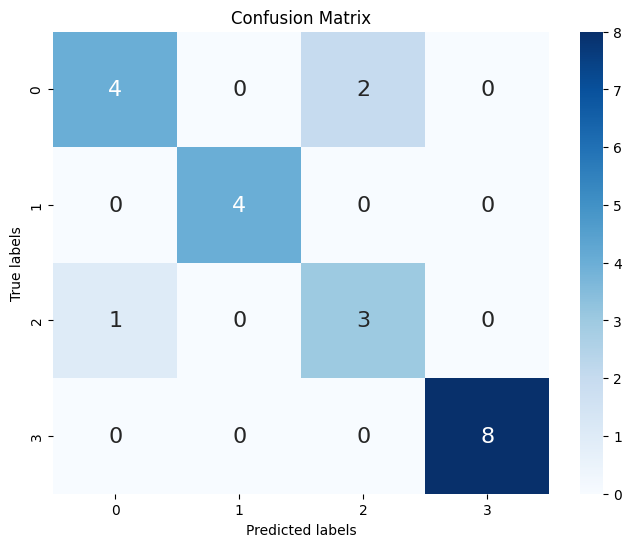

In [33]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()